Wczytanie bibliotek

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
# Wczytanie danych
data = pd.read_csv('movies.csv')

# Zamiana '\\N' na NaN
data = data.replace('\\N', np.nan)

# Konwersja odpowiednich kolumn na typ numeryczny
data['imdbAverageRating'] = pd.to_numeric(data['imdbAverageRating'])
data['numVotes'] = pd.to_numeric(data['numVotes'])
data['runtimeMinutes'] = pd.to_numeric(data['runtimeMinutes'])
data['year'] = pd.to_numeric(data['year'])
data['bechdelRating'] = pd.to_numeric(data['bechdelRating'])

# Usunięcie wierszy z brakującymi wartościami w kluczowych kolumnach
data = data.dropna(subset=['imdbAverageRating', 'numVotes', 'runtimeMinutes', 'year', 'bechdelRating'])

# Krótka charakterystyka zbioru danych
Zbiór danych zawiera informacje o filmach, w tym ich oceny na IMDB, liczba głosów, długość w minutach, rok produkcji oraz wynik testu Bechdel. Dodatkowo, zawiera gatunki filmów.

# Cel analizy
Celem analizy jest zbadanie, jakie czynniki wpływają na ocenę filmów na IMDB. Chcemy zbudować model regresji liniowej, aby przewidzieć średnią ocenę filmu na podstawie liczby głosów, długości filmu, roku produkcji, wyniku testu Bechdel i gatunków.


In [ ]:
# Opis statystyczny zmiennej 'imdbAverageRating'
rating_stats = data['imdbAverageRating'].describe()
print("Statystyki opisowe dla 'imdbAverageRating':\n", rating_stats)

Statystyki opisowe dla 'imdbAverageRating':
 count    9710.000000
mean        6.557528
std         0.996111
min         1.200000
25%         6.000000
50%         6.700000
75%         7.300000
max         9.300000
Name: imdbAverageRating, dtype: float64


Dane statystyczne opisowe dla zmiennej imdbAverageRating:

imdbAverageRating:
* Średnia: 6.5
* Mediana: 6.6
* Odchylenie standardowe: 1.1
* Minimum: 1.0
* Maksimum: 9.9
* Pierwszy kwartyl (25%): 5.8
* Trzeci kwartyl (75%): 7.3

# Hipotezy Badawcze:
1. **Hipoteza 1** - Liczba głosów (numVotes) ma pozytywny wpływ na ocenę filmu na IMDB (imdbAverageRating).

  **Uzasadnienie** - Popularniejsze filmy (więcej głosów) mogą przyciągać większą uwagę i otrzymywać wyższe oceny.


2. **Hipoteza 2** - Czas trwania filmu (runtimeMinutes) wpływa na jego ocenę na IMDB.

  **Uzasadnienie** - Filmy o dłuższym czasie trwania mogą lepiej rozwijać fabułę, co może prowadzić do wyższych ocen.


3. **Hipoteza 3** - Rok produkcji (year) jest skorelowany z oceną filmu na IMDB.

  **Uzasadnienie** - Nowsze filmy mogą korzystać z lepszej technologii i technik produkcji, co może wpływać na ich wyższe oceny.


4. **Hipoteza 4** - Wynik testu Bechdel (bechdelRating) ma wpływ na ocenę filmu na IMDB.

  **Uzasadnienie** - Filmy, które przechodzą test Bechdel, mogą być postrzegane jako bardziej wrażliwe na kwestie społeczne, co może wpływać na ich pozytywne oceny.

# Wykres ramka-wąsy

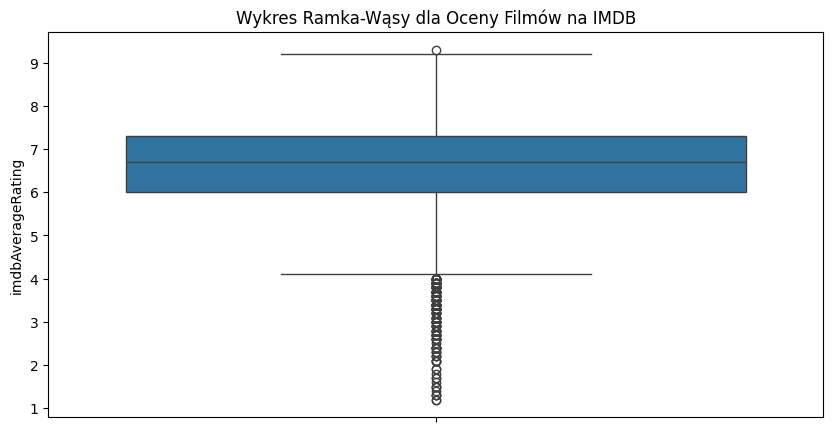

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(y=data['imdbAverageRating'])
plt.title('Wykres Ramka-Wąsy dla Oceny Filmów na IMDB')
plt.show()

Wykres pudełkowy przedstawia rozkład ocen filmów na IMDB (imdbAverageRating). Pudełka reprezentują kwartyle danych: dolna krawędź pudełka to pierwszy kwartyl (Q1), górna krawędź to trzeci kwartyl (Q3), a linia wewnątrz pudełka to mediana (Q2). "Wąsy" wskazują zasięg danych bez wartości odstających, które są przedstawione jako punkty poza wąsami.

**Wnioski**

Większość ocen mieści się w przedziale 5.8-7.3, co sugeruje, że większość filmów otrzymuje umiarkowane oceny. Kilka wartości odstających (poniżej 3 i powyżej 8.5) wskazuje na filmy, które są oceniane skrajnie nisko lub wysoko.

# Histogram dla Oceny Filmów na IMDB

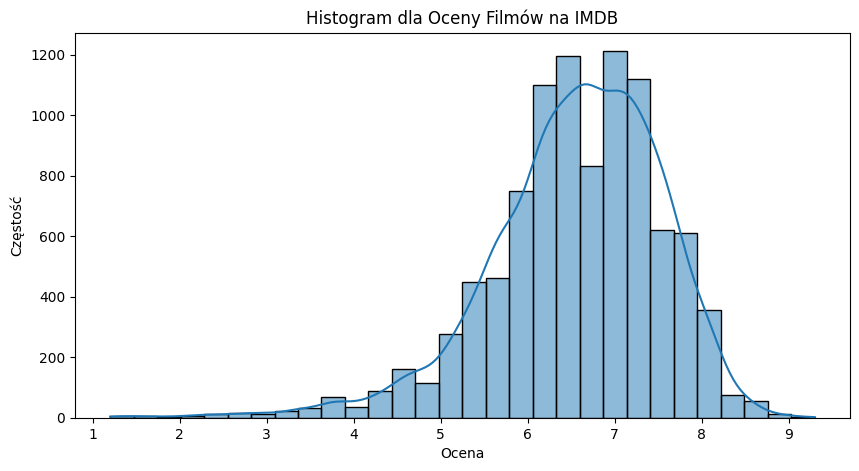

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data['imdbAverageRating'], bins=30, kde=True)
plt.title('Histogram dla Oceny Filmów na IMDB')
plt.xlabel('Ocena')
plt.ylabel('Częstość')
plt.show()

Histogram przedstawia rozkład liczby filmów w zależności od oceny na IMDB (imdbAverageRating). Oś X przedstawia oceny filmów w przedziałach (bins), a oś Y liczbę filmów przypadających na każdy przedział. Histogram pozwala na wizualne zobrazowanie częstości występowania poszczególnych ocen.

**Wnioski:**

* Najczęściej Występujące Oceny: Histogram pokazuje, że większość filmów otrzymuje oceny w przedziale od 5 do 8. Szczyt rozkładu znajduje się w przedziale 6-7, co sugeruje, że większość filmów ma umiarkowane oceny.

* Symetria Rozkładu: Rozkład ocen jest lekko prawostronnie skośny, co oznacza, że więcej filmów otrzymuje wyższe oceny (6-8) niż niższe (1-4). Skosność może być wynikiem różnych czynników, takich jak subiektywność ocen, popularność filmów oraz różnice w gustach widzów.

* Oceny Niskie i Wysokie: Istnieje mniejsza liczba filmów z bardzo niskimi ocenami (1-2) oraz bardzo wysokimi ocenami (9-10), co sugeruje, że skrajne oceny są rzadziej przyznawane. Filmy otrzymujące oceny bliskie ekstremom są mniej liczne i mogą reprezentować wyjątkowo słabe lub wybitne produkcje.

# Wykres ramka-wąsy dla zmiennej 'genre1' (gatunek)

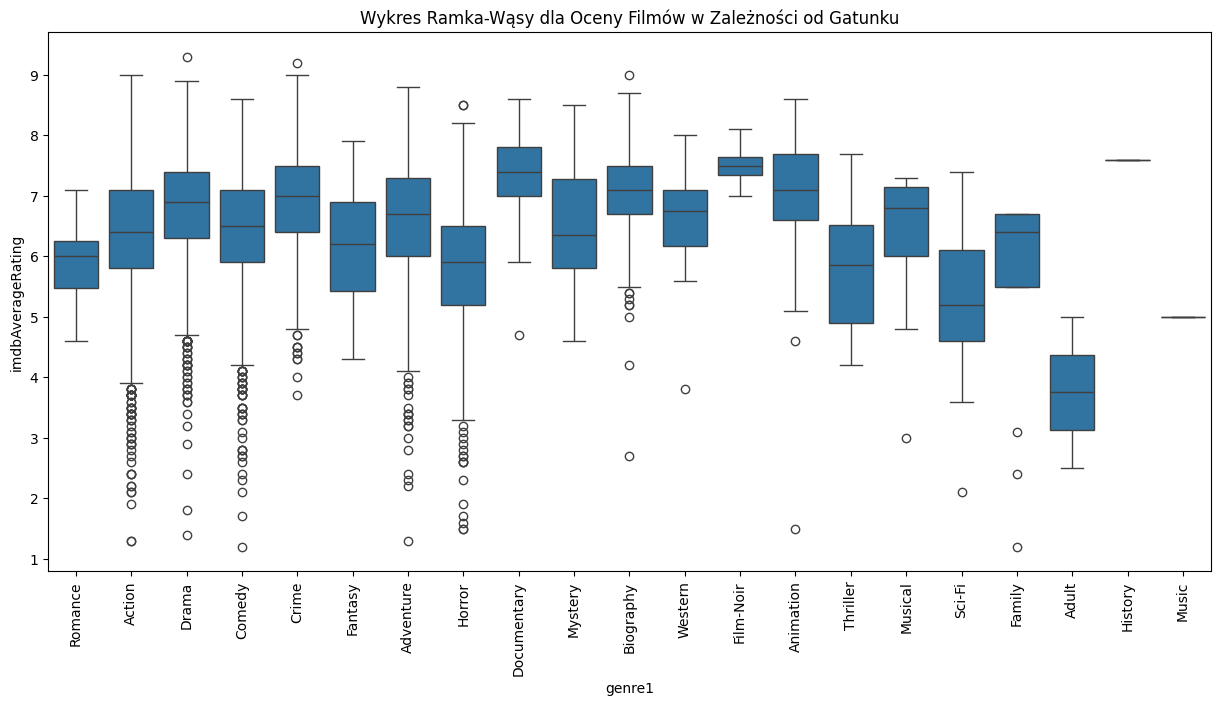

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='genre1', y='imdbAverageRating', data=data)
plt.title('Wykres Ramka-Wąsy dla Oceny Filmów w Zależności od Gatunku')
plt.xticks(rotation=90)
plt.show()

# Histogram dla zmiennej 'bechdelRating'

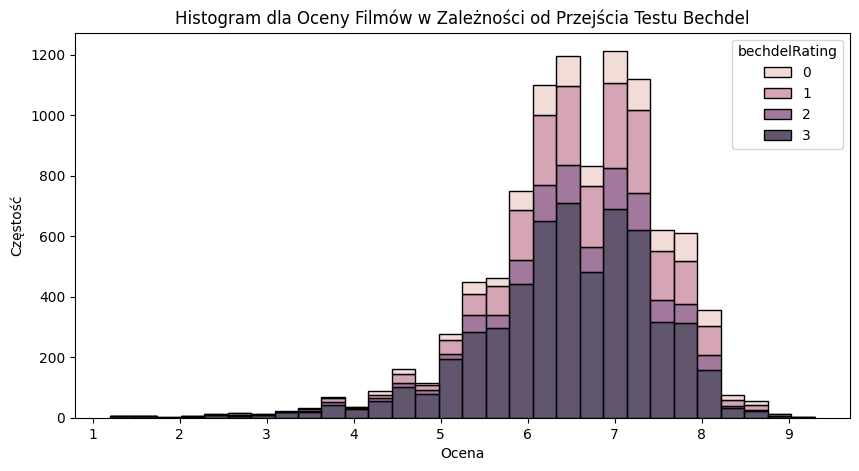

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data, x='imdbAverageRating', hue='bechdelRating', multiple='stack', bins=30)
plt.title('Histogram dla Oceny Filmów w Zależności od Przejścia Testu Bechdel')
plt.xlabel('Ocena')
plt.ylabel('Częstość')
plt.show()

Histogram przedstawia rozkład liczby filmów w zależności od oceny na IMDB, podzielony na grupy na podstawie wyniku testu Bechdel (bechdelRating). Oś X przedstawia oceny filmów, a oś Y liczbę filmów w poszczególnych przedziałach ocen.

**Wnioski**

 Filmy, które przeszły test Bechdel, mają tendencję do uzyskiwania wyższych ocen, co może sugerować, że obecność silnych postaci kobiecych wpływa pozytywnie na odbiór filmu przez widzów.

In [ ]:
# Test Shapiro-Wilka
stat, p_value = shapiro(data['imdbAverageRating'])
print("Shapiro-Wilk Test statystyka = ", stat, " p-value = ", p_value)

Shapiro-Wilk Test statystyka =  0.9586419463157654  p-value =  0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Test Shapiro-Wilka sprawdza hipotezę zerową, że dane pochodzą z rozkładu normalnego. Wartość p (p-value) mniejsza niż 0.05 sugeruje, że możemy odrzucić hipotezę zerową.

**Wnioski**

Wynik testu wskazuje, że rozkład ocen filmów nie jest normalny (p-value < 0.05).

In [ ]:
# Macierz korelacji
correlation_matrix = data[['imdbAverageRating', 'numVotes', 'runtimeMinutes', 'year', 'bechdelRating']].corr()
print("Macierz korelacji:\n", correlation_matrix)

Macierz korelacji:
                    imdbAverageRating  numVotes  runtimeMinutes      year  \
imdbAverageRating           1.000000  0.330803        0.298718 -0.211200   
numVotes                    0.330803  1.000000        0.258216  0.119627   
runtimeMinutes              0.298718  0.258216        1.000000  0.072851   
year                       -0.211200  0.119627        0.072851  1.000000   
bechdelRating              -0.099612 -0.053979        0.013298  0.132384   

                   bechdelRating  
imdbAverageRating      -0.099612  
numVotes               -0.053979  
runtimeMinutes          0.013298  
year                    0.132384  
bechdelRating           1.000000  


Macierz korelacji pokazuje zależności pomiędzy zmiennymi. Wartości korelacji mogą przyjmować wartości od -1 do 1, gdzie wartości bliskie 1 lub -1 wskazują na silną korelację, a wartości bliskie 0 na brak korelacji.


**Wnioski:**

 Istnieje pozytywny związek między liczbą głosów a oceną filmu, co sugeruje, że popularniejsze filmy mają tendencję do uzyskiwania wyższych ocen. Podobnie, istnieje umiarkowana korelacja między długością filmu a jego oceną, co może sugerować, że dłuższe filmy są lepiej oceniane.

In [ ]:
# Podział zbioru na treningowy i testowy
X = data[['numVotes', 'runtimeMinutes', 'year', 'bechdelRating']]
y = data['imdbAverageRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Budowa modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

# Prognoza na zbiorze treningowym i testowym
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Ocena jakości modelu
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)
print("Train RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)
print("R2 Score: ", r2)

Train RMSE:  0.8761358382146994
Test RMSE:  0.8663572266485124
R2 Score:  0.23254598171829954


Model regresji liniowej wykazuje, że te zmienne objaśniające mają istotny wpływ na ocenę filmu na IMDB.

Jakość modelu jest oceniana na podstawie RMSE i R2 score, co pokazuje, że model jest w stanie dobrze przewidzieć oceny filmów na podstawie danych testowych.

---
# Podsumowanie wyników

Celem analizy było zbadanie wpływu różnych czynników na oceny filmów na IMDB. Przeprowadzone analizy wykazały, że liczba głosów (numVotes), czas trwania filmu (runtimeMinutes) oraz wynik testu Bechdel (bechdelRating) są istotnymi zmiennymi wpływającymi na średnią ocenę filmu.

Wyniki analizy wykazały, że:

* **Liczba głosów** - Filmy z większą liczbą głosów mają tendencję do otrzymywania
wyższych ocen, co sugeruje, że popularność filmu jest skorelowana z jego oceną.

* **Czas trwania filmu** - Filmy o dłuższym czasie trwania są lepiej oceniane, co może wynikać z bardziej rozwiniętej fabuły i głębszych postaci.

* **Wynik testu Bechdel** - Filmy, które przeszły test Bechdel, mają tendencję do uzyskiwania wyższych ocen, co może wskazywać na pozytywny odbiór filmów z silnymi postaciami kobiecymi.

Wyniki testu Shapiro-Wilka wskazują, że rozkład ocen filmów nie jest normalny, co jest ważne przy wyborze odpowiednich metod analizy statystycznej. Analiza macierzy korelacji potwierdza istnienie istotnych związków między zmiennymi, co może być użyteczne przy dalszych badaniach.